In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wound-classification/Wound_dataset copy/Abrasions/abrasions (85).jpg
/kaggle/input/wound-classification/Wound_dataset copy/Abrasions/abrasions (55).jpg
/kaggle/input/wound-classification/Wound_dataset copy/Abrasions/mirrored_abrasions (40).jpg
/kaggle/input/wound-classification/Wound_dataset copy/Abrasions/abrasions (28).jpg
/kaggle/input/wound-classification/Wound_dataset copy/Abrasions/abrasions (9).jpg
/kaggle/input/wound-classification/Wound_dataset copy/Abrasions/abrasions (69).jpg
/kaggle/input/wound-classification/Wound_dataset copy/Abrasions/abrasions (39).jpg
/kaggle/input/wound-classification/Wound_dataset copy/Abrasions/abrasions (60).jpg
/kaggle/input/wound-classification/Wound_dataset copy/Abrasions/mirrored_abrasions (20).jpg
/kaggle/input/wound-classification/Wound_dataset copy/Abrasions/abrasions (70).jpg
/kaggle/input/wound-classification/Wound_dataset copy/Abrasions/mirrored_abrasions (58).jpg
/kaggle/input/wound-classification/Wound_dataset copy/Abrasio

In [2]:
import os
import shutil
import random

def split_dataset(input_dir, output_dir, train_ratio=0.8, seed=42):
    random.seed(seed)

    classes = os.listdir(input_dir)
    classes = [classes[i] for i in [2,3,4,6,7,8,9]]
    for cls in classes:
        cls_path = os.path.join(input_dir, cls)
        if not os.path.isdir(cls_path):
            continue  

        images = os.listdir(cls_path)
        random.shuffle(images)

        split_idx = int(len(images) * train_ratio)
        train_imgs = images[:split_idx]
        test_imgs = images[split_idx:]

       
        train_cls_dir = os.path.join(output_dir, "train", cls)
        test_cls_dir = os.path.join(output_dir, "test", cls)
        os.makedirs(train_cls_dir, exist_ok=True)
        os.makedirs(test_cls_dir, exist_ok=True)

        
        for img in train_imgs:
            shutil.copy(os.path.join(cls_path, img), os.path.join(train_cls_dir, img))
        for img in test_imgs:
            shutil.copy(os.path.join(cls_path, img), os.path.join(test_cls_dir, img))

    print(" Dataset split completed!")

split_dataset("/kaggle/input/wound-classification/Wound_dataset copy", "/kaggle/working/", train_ratio=0.7)


 Dataset split completed!


In [3]:
import os
from PIL import Image
from torchvision import transforms
import random

input_dir = "/kaggle/working/train"     
output_dir = "/kaggle/working/train_aug" 


augment = transforms.Compose([
   
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3, hue=0.1),
])


os.makedirs(output_dir, exist_ok=True)

for class_name in os.listdir(input_dir):
    class_path = os.path.join(input_dir, class_name)
    if not os.path.isdir(class_path):
        continue
    
    save_dir = os.path.join(output_dir, class_name)
    os.makedirs(save_dir, exist_ok=True)
    
    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)
        
        try:
            image = Image.open(img_path).convert("RGB")
        except:
            continue
        
        
        image.save(os.path.join(save_dir, img_name))
        
        
        N = 3
        for i in range(N):
            aug_img = augment(image)
            aug_name = f"{os.path.splitext(img_name)[0]}_aug{i}.jpg"
            aug_img.save(os.path.join(save_dir, aug_name))

print(" Physical augmentation completed and saved to:", output_dir)


 Physical augmentation completed and saved to: /kaggle/working/train_aug


In [4]:
# import os
# import shutil

# src_dir = "/kaggle/input/wound-dataset/Wound_dataset" 
# dst_dir = "/kaggle/working/test" 

# for class_name in os.listdir(src_dir):
#     if class_name not in ["Abrasions", "Burns", "Cut", "Normal"]:
        
#         continue
        
    
#     src_class = os.path.join(src_dir, class_name)
#     dst_class = os.path.join(dst_dir, class_name)
    
   
#     if not os.path.isdir(src_class):
#         continue
    
#     os.makedirs(dst_class, exist_ok=True) 
    
#     for file_name in os.listdir(src_class):
#         src_path = os.path.join(src_class, file_name)
#         dst_path = os.path.join(dst_class, file_name)
        
#         # if file with same name exists, rename it
#         if os.path.exists(dst_path):
#             base, ext = os.path.splitext(file_name)
#             dst_path = os.path.join(dst_class, f"{base}_copy{ext}")
        
#         shutil.copy(src_path, dst_path)

# print("All images successfully moved from dataset2 → dataset1")


In [5]:
import os
from PIL import Image
from torchvision import transforms
import random

input_dir = "/kaggle/working/test"     
output_dir = "/kaggle/working/test_aug" 


augment = transforms.Compose([
   
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3, hue=0.1),
])


os.makedirs(output_dir, exist_ok=True)

for class_name in os.listdir(input_dir):
    class_path = os.path.join(input_dir, class_name)
    if not os.path.isdir(class_path):
        continue
    
    save_dir = os.path.join(output_dir, class_name)
    os.makedirs(save_dir, exist_ok=True)
    
    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)
        
        try:
            image = Image.open(img_path).convert("RGB")
        except:
            continue
        
        
        image.save(os.path.join(save_dir, img_name))
        
        
        N = 2
        for i in range(N):
            aug_img = augment(image)
            aug_name = f"{os.path.splitext(img_name)[0]}_aug{i}.jpg"
            aug_img.save(os.path.join(save_dir, aug_name))

print(" Physical augmentation completed and saved to:", output_dir)


 Physical augmentation completed and saved to: /kaggle/working/test_aug


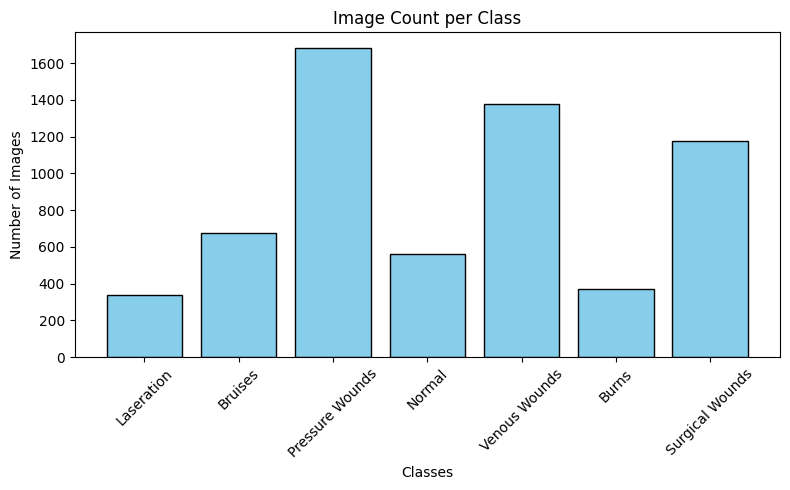

In [6]:
import os
import matplotlib.pyplot as plt

def plot_class_distribution(data_dir):

    
    class_counts = {}
    
    for class_name in os.listdir(data_dir):
        class_path = os.path.join(data_dir, class_name)
        if os.path.isdir(class_path):
            num_images = len([
                f for f in os.listdir(class_path)
                if f.lower().endswith(('.png', '.jpg', '.jpeg'))
            ])
            class_counts[class_name] = num_images

   
    plt.figure(figsize=(8, 5))
    plt.bar(class_counts.keys(), class_counts.values(), color='skyblue', edgecolor='black')
    plt.xlabel("Classes")
    plt.ylabel("Number of Images")
    plt.title("Image Count per Class")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

plot_class_distribution("/kaggle/working/train_aug")




In [7]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import numpy as np
import os


train_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.RandomResizedCrop(224),              
    transforms.RandomHorizontalFlip(p=0.5),          
    transforms.RandomRotation(15),                   
    transforms.ColorJitter(                          
        brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1
    ),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

test_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])


train_data = datasets.ImageFolder('/kaggle/working/train_aug', transform=train_transforms)
test_data = datasets.ImageFolder('/kaggle/working/test_aug', transform=test_transforms)

train_data_loader = DataLoader(train_data, batch_size=16, shuffle=True, num_workers=2)
test_data_loader = DataLoader(test_data, batch_size=16, shuffle=False, num_workers=2)

print(f"Training samples: {len(train_data)}")
print(f"Testing samples: {len(test_data)}")


Training samples: 6188
Testing samples: 2001


In [8]:
!pip install optuna

In [9]:
# import optuna
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from torchvision import models

# def objective(trial):
#     # Hyperparameters
#     lr = trial.suggest_loguniform("lr", 1e-6, 1e-2)
#     optim_name = trial.suggest_categorical("optimizer", ["Adam", "RMSprop"])
#     dropout = trial.suggest_float("dropout", 0.1, 0.5)

#     # Model
#     model = models.resnet18(pretrained=True)
#     model.fc = nn.Sequential(
#         nn.Dropout(dropout),
#         nn.Linear(model.fc.in_features, 7)  
#     )

#     device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#     model.to(device)

#     # Loss and Optimizer
#     criterion = nn.CrossEntropyLoss()
#     optimizer = getattr(optim, optim_name)(model.parameters(), lr=lr)

    
    
#     for epoch in range(num_epochs):
#         model.train()
#         for images, labels in train_data_loader:
#             images, labels = images.to(device), labels.to(device)

#             optimizer.zero_grad()
#             logits = model(images)
#             loss = criterion(logits, labels)
#             loss.backward()
#             optimizer.step()

       
#         print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")


#     model.eval()
#     correct, total = 0, 0
#     with torch.no_grad():
#         for images, labels in test_data_loader:
#             images, labels = images.to(device), labels.to(device)
#             logits = model(images)
#             preds = torch.argmax(logits, dim=1)
#             correct += (preds == labels).sum().item()
#             total += labels.size(0)
    
#     accuracy = correct / total

   
#     torch.save({
#         "epoch": num_epochs,
#         "model_state": model.state_dict(),
#         "optimizer_state": optimizer.state_dict(),
#         "loss": loss,
#      }, "wound.pth")

#     return accuracy


In [10]:
# study = optuna.create_study(direction="maximize")  
# study.optimize(objective, n_trials=20)  

# print("Best trial:")
# trial = study.best_trial
# print("  Accuracy:", trial.value)
# print("  Best hyperparameters:", trial.params)


In [11]:
# all_labels = []
# for _, labels in test_data_loader:
#     all_labels.extend(labels.tolist())

# print(f"Min label: {min(all_labels)}, Max label: {max(all_labels)}")


In [12]:
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from torchvision import models
# import matplotlib.pyplot as plt

# lr = 8.083031267478023e-05
# optimizer_name = "RMSprop"
# dropout = 0.3006558931441291
# num_epochs = 20

# model = models.resnet18(pretrained=True)
# model.fc = nn.Sequential(
#     nn.Dropout(dropout),
#     nn.Linear(model.fc.in_features, 3)
# )

# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model.to(device)

# criterion = nn.CrossEntropyLoss()
# optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=1e-4)



# train_losses, val_losses = [], []
# train_accs, val_accs = [], []

# for epoch in range(num_epochs):
#     model.train()
#     running_loss = 0.0
#     total, correct = 0, 0

#     for images, labels in train_data_loader:
#         images, labels = images.to(device), labels.to(device)

#         optimizer.zero_grad()
#         outputs = model(images)
#         loss = criterion(outputs, labels)
#         loss.backward()
#         optimizer.step()

#         running_loss += loss.item() * images.size(0)
#         _, preds = torch.max(outputs, 1)
#         correct += (preds == labels).sum().item()
#         total += labels.size(0)

#     epoch_loss = running_loss / len(train_data_loader.dataset)
#     epoch_acc = correct / total

    
#     model.eval()
#     correct, total = 0, 0
#     test_loss = 0.0

#     with torch.no_grad():
#         for images, labels in test_data_loader:
#             images, labels = images.to(device), labels.to(device)
#             outputs = model(images)
#             loss = criterion(outputs, labels)
#             test_loss += loss.item() * images.size(0)
#             preds = torch.argmax(outputs, dim=1)
#             correct += (preds == labels).sum().item()
#             total += labels.size(0)

#     test_epoch_loss = test_loss / len(test_data_loader.dataset)
#     test_accuracy = correct / total

    
#     train_losses.append(epoch_loss)
#     val_losses.append(test_epoch_loss)
#     train_accs.append(epoch_acc)
#     val_accs.append(test_accuracy)

#     print(f"Epoch [{epoch+1}/{num_epochs}] "
#           f"Train Loss: {epoch_loss:.4f}, Train Acc: {epoch_acc:.4f} | "
#           f"Val Loss: {test_epoch_loss:.4f}, Val Acc: {test_accuracy:.4f}")


# torch.save({
#     "epoch": num_epochs,
#     "model_state": model.state_dict(),
#     "optimizer_state": optimizer.state_dict(),
#     "loss": loss,
# }, "checkpoint.pth")

# torch.save(model.state_dict(), "wound_model.pth")


# epochs = range(1, num_epochs + 1)
# plt.figure(figsize=(12, 5))


# plt.subplot(1, 2, 1)
# plt.plot(epochs, train_losses, marker='o', label='Train Loss')
# plt.plot(epochs, val_losses, marker='o', label='Validation Loss')
# plt.title('Training vs Validation Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()
# plt.grid(True)

# plt.subplot(1, 2, 2)
# plt.plot(epochs, train_accs, marker='o', label='Train Accuracy')
# plt.plot(epochs, val_accs, marker='o', label='Validation Accuracy')
# plt.title('Training vs Validation Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.grid(True)

# plt.tight_layout()
# plt.show()


Using device: cuda


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)



=== Classification Report ===
                 precision    recall  f1-score   support

        Bruises       0.98      1.00      0.99       219
          Burns       0.95      0.83      0.89       123
     Laseration       0.91      1.00      0.95       111
         Normal       0.99      0.98      0.98       180
Pressure Wounds       0.91      0.97      0.94       543
Surgical Wounds       0.99      0.87      0.93       378
  Venous Wounds       0.94      0.98      0.96       447

       accuracy                           0.95      2001
      macro avg       0.95      0.94      0.95      2001
   weighted avg       0.95      0.95      0.95      2001



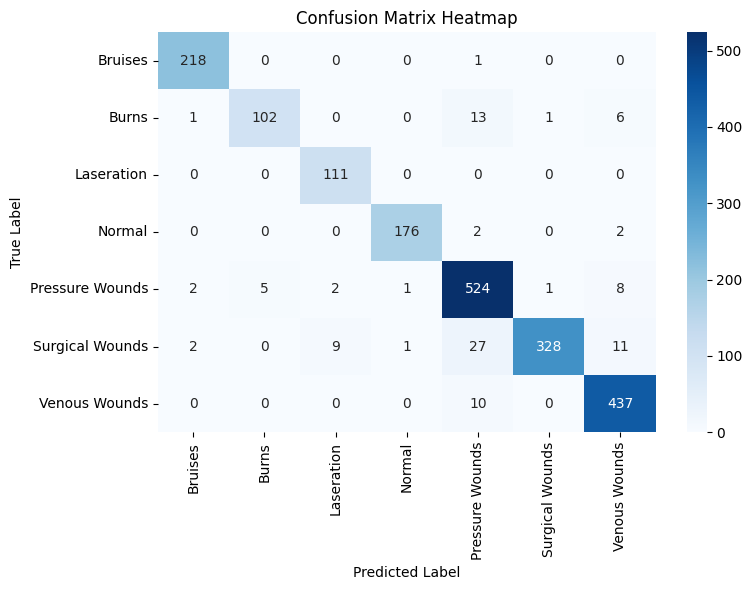

In [13]:
import torch
import torch.nn as nn
from torchvision import models, transforms, datasets
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

def evaluate_model(model_path="/kaggle/input/wound_classifier_better/pytorch/default/1/wound.pth", test_dir="kaggle/working/test_aug", batch_size=32):
    
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")

    
    model = models.resnet18(pretrained=False)
    model.fc = nn.Sequential(
        nn.Dropout(0.3),
        nn.Linear(model.fc.in_features, 7) 
    )
    model.load_state_dict(torch.load(model_path, map_location=device))
    model.to(device)
    model.eval()

   
    test_transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])
    ])

   
    test_dataset = datasets.ImageFolder(test_dir, transform=test_transform)
    test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            preds = torch.argmax(outputs, dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    
    print("\n=== Classification Report ===")
    print(classification_report(all_labels, all_preds, target_names=test_dataset.classes))

    
    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=test_dataset.classes,
                yticklabels=test_dataset.classes)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix Heatmap")
    plt.tight_layout()
    plt.show()

evaluate_model("/kaggle/input/woundd/pytorch/default/1/wound_model.pth", "/kaggle/working/test_aug")
